In [51]:
# Imporing libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor, plot_tree

import matplotlib.pyplot  as plt

# Loading the dataset

In [52]:
house = pd.read_csv("Datasets\housing.csv")

In [53]:
house.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [54]:
d_house = pd.get_dummies(house, drop_first = True)
d_house

,price,lotsize,bedrooms,bathrms,stories,garagepl,driveway_yes,recroom_yes,fullbase_yes,gashw_yes,airco_yes,prefarea_yes
0,42000.0,5850,3,1,2,1,1,0,1,0,0,0
1,38500.0,4000,2,1,1,0,1,0,0,0,0,0
2,49500.0,3060,3,1,1,0,1,0,0,0,0,0
3,60500.0,6650,3,1,2,0,1,1,0,0,0,0
4,61000.0,6360,2,1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,4,0,1,1,0,0,1,0
542,94000.0,6000,3,2,4,0,1,0,0,0,1,0
543,103000.0,6000,3,2,4,1,1,1,0,0,1,0
544,105000.0,6000,3,2,2,1,1,1,0,0,1,0


# Preparing dataset for Regressor model

In [55]:
y = d_house["price"]

X = d_house.drop("price", axis = 1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    #stratify = y, # what does stratify do?
                                                    random_state = 2022,
                                                    train_size = 0.7)

In [57]:
dtr = DecisionTreeRegressor(random_state = 2022,
                           max_depth = 2)

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=2022)

# Plotting the Decision Tree Plot

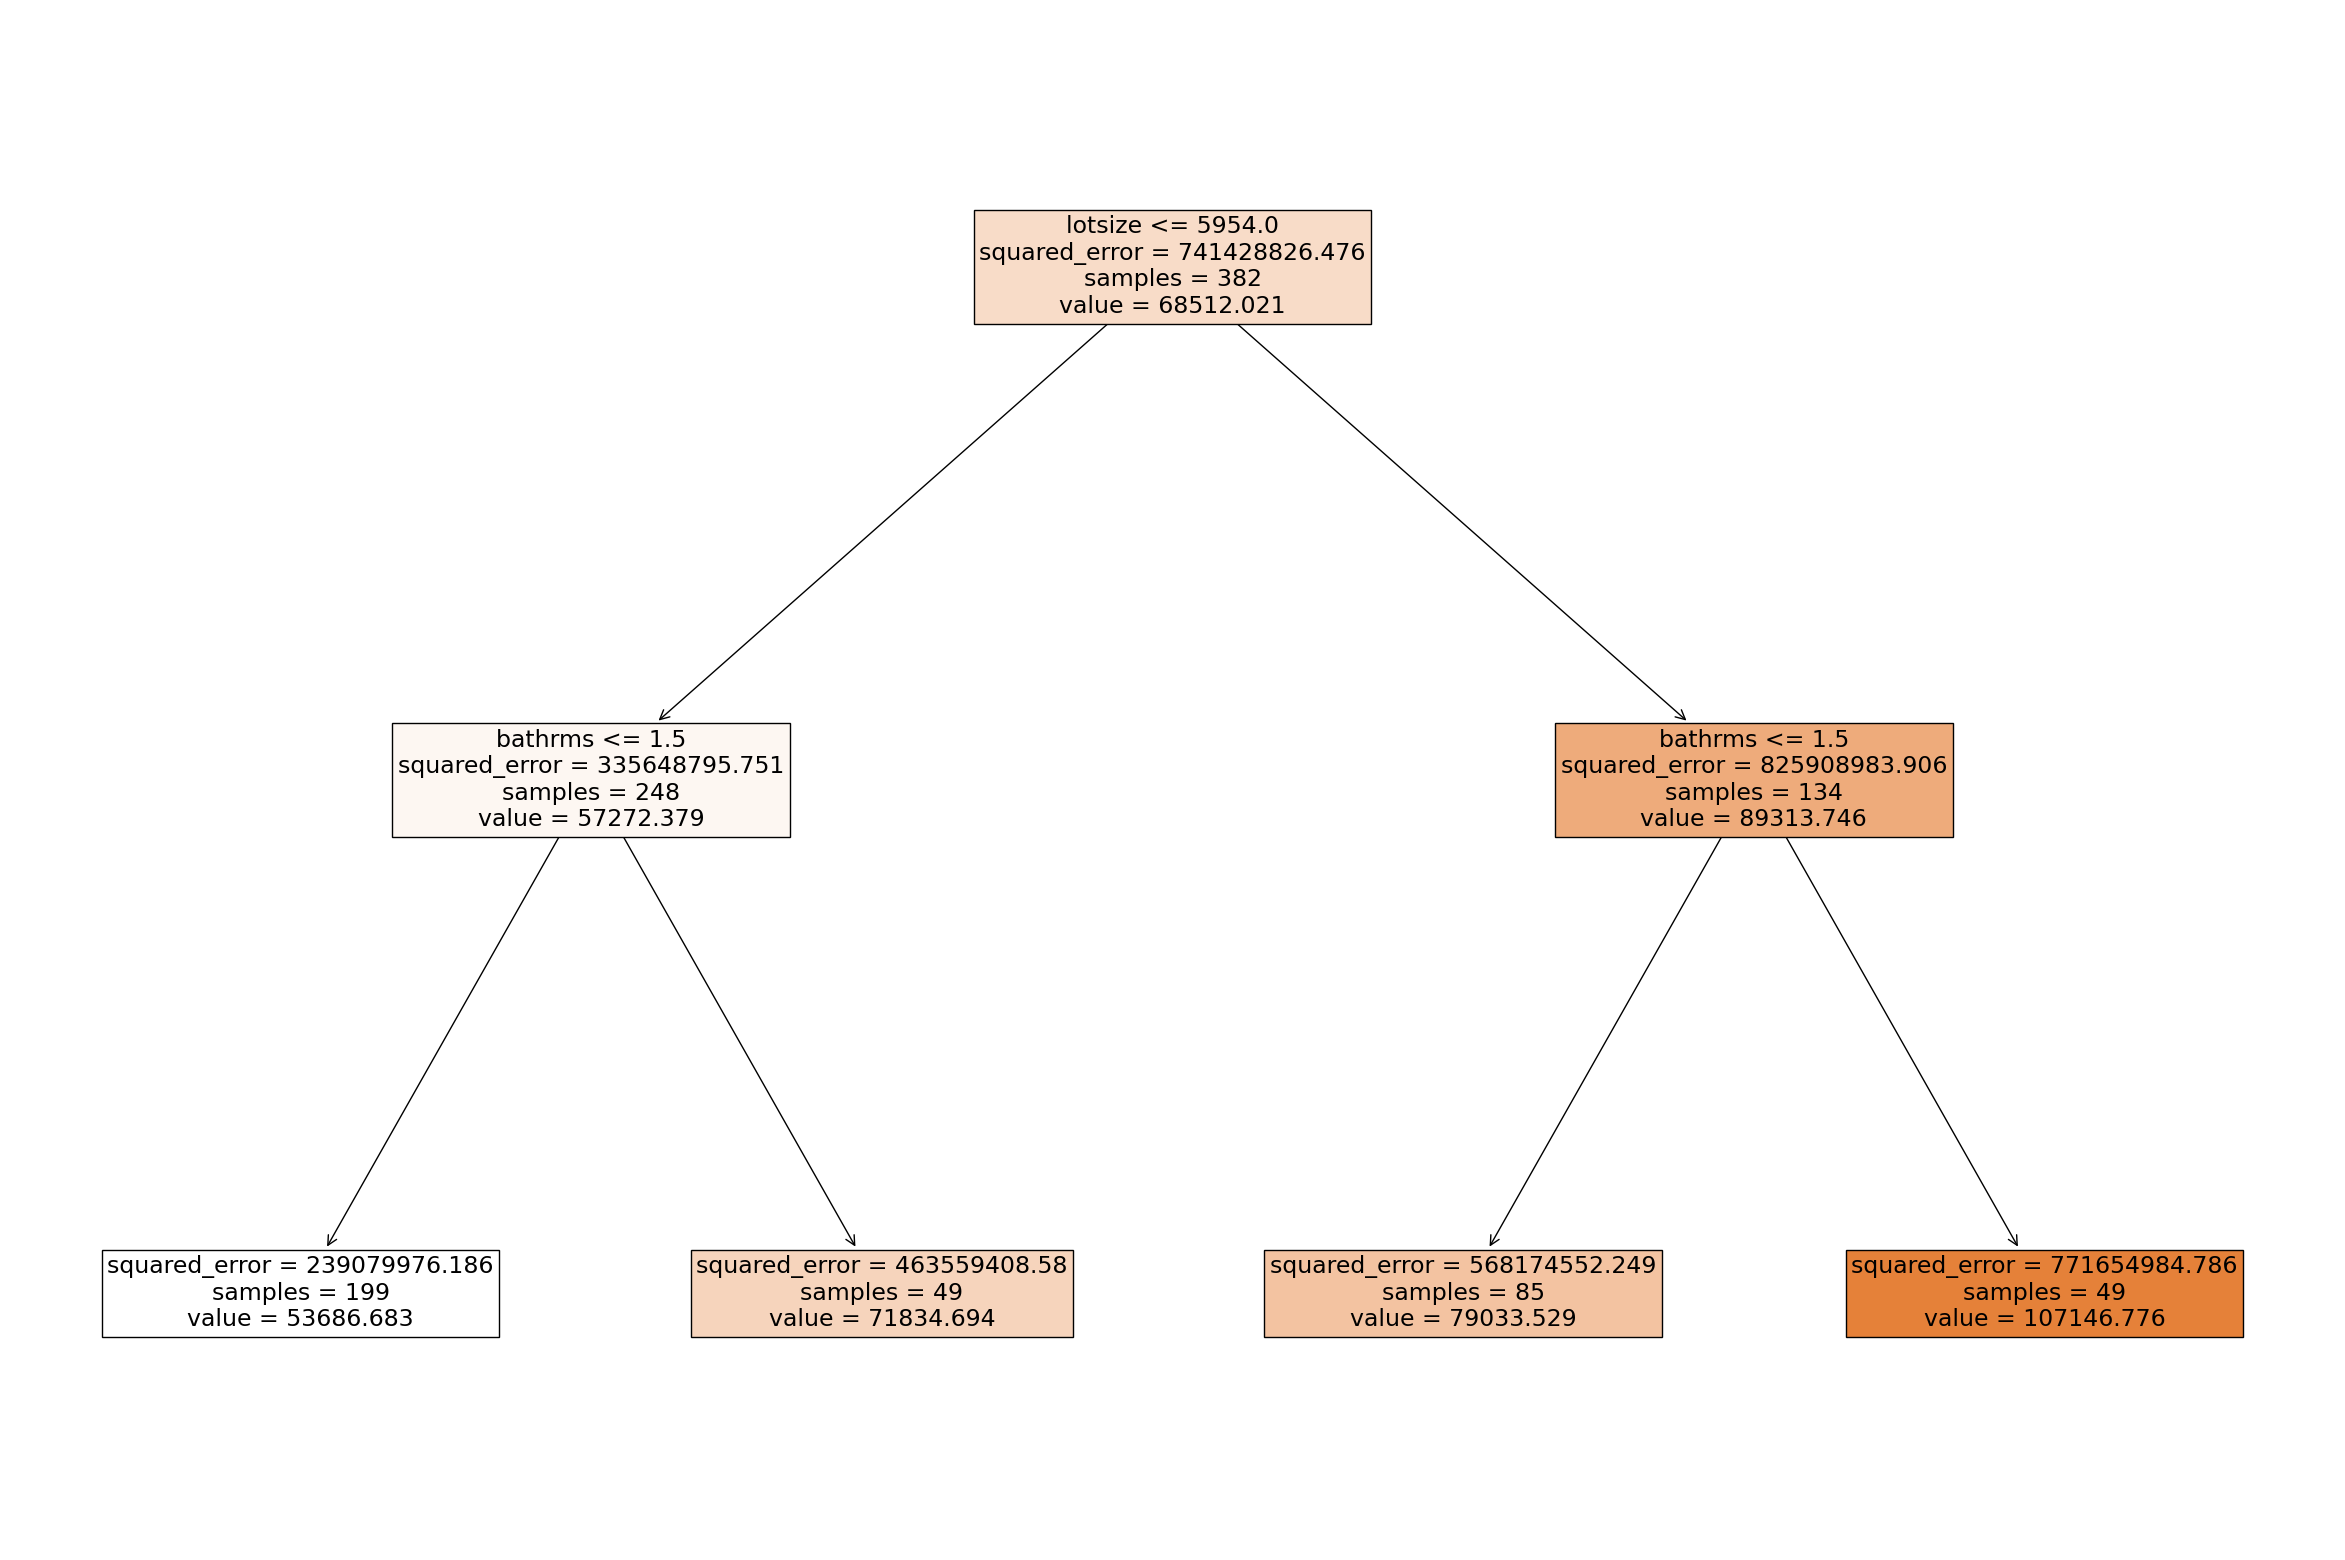

In [58]:
plt.figure(figsize = (30, 20))
plot_tree(dtr, feature_names = X.columns,
         fontsize = 17, filled = True)
plt.show()

In [59]:
y_pred = dtr.predict(X_test)
print(r2_score(y_test, y_pred))

0.4521789374828188


In [60]:
params = {'max_depth':[2,3,4,5,None],
         'min_samples_split':[2,5,10],
         'min_samples_leaf':[1,5,10]}

In [61]:
kfold = StratifiedKFold(n_splits = 5,
                       shuffle = True,
                       random_state = 2022)

In [62]:
gcv  = GridSearchCV(dtr, param_grid = params,
                    verbose=3, cv = kfold,
                    scoring = 'r2')
gcv.fit(X,y)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.427 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.400 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.421 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.397 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, min_samples_split=2;, score=0.397 total time=   0.0s
[CV 1/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.427 total time=   0.0s
[CV 2/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.400 total time=   0.0s
[CV 3/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.421 total time=   0.0s
[CV 4/5] END max_depth=2, min_samples_leaf=1, min_samples_split=5;, score=0.397 total time=   0.0s
[CV 5/5] END max_depth=2, min_samples_leaf=1, m

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.470 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.469 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.407 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=2;, score=0.485 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.229 total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.470 total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.469 total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.407 total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.485 total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=1, min_samples_split=10;, score=0.229 total time=   0.0s
[CV 2/5] 

[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=0.470 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=0.517 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=0.389 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=0.389 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=2;, score=0.456 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=0.470 total time=   0.0s
[CV 2/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=0.517 total time=   0.0s
[CV 3/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=0.389 total time=   0.0s
[CV 4/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=0.389 total time=   0.0s
[CV 5/5] END max_depth=5, min_samples_leaf=5, min_samples_split=5;, score=0.456 total time=   0.0s
[CV 1/5] E

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=DecisionTreeRegressor(max_depth=2, random_state=2022),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=3)

In [63]:
print(gcv.best_params_)

{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [64]:
print(gcv.best_score_)

0.49024317399773765


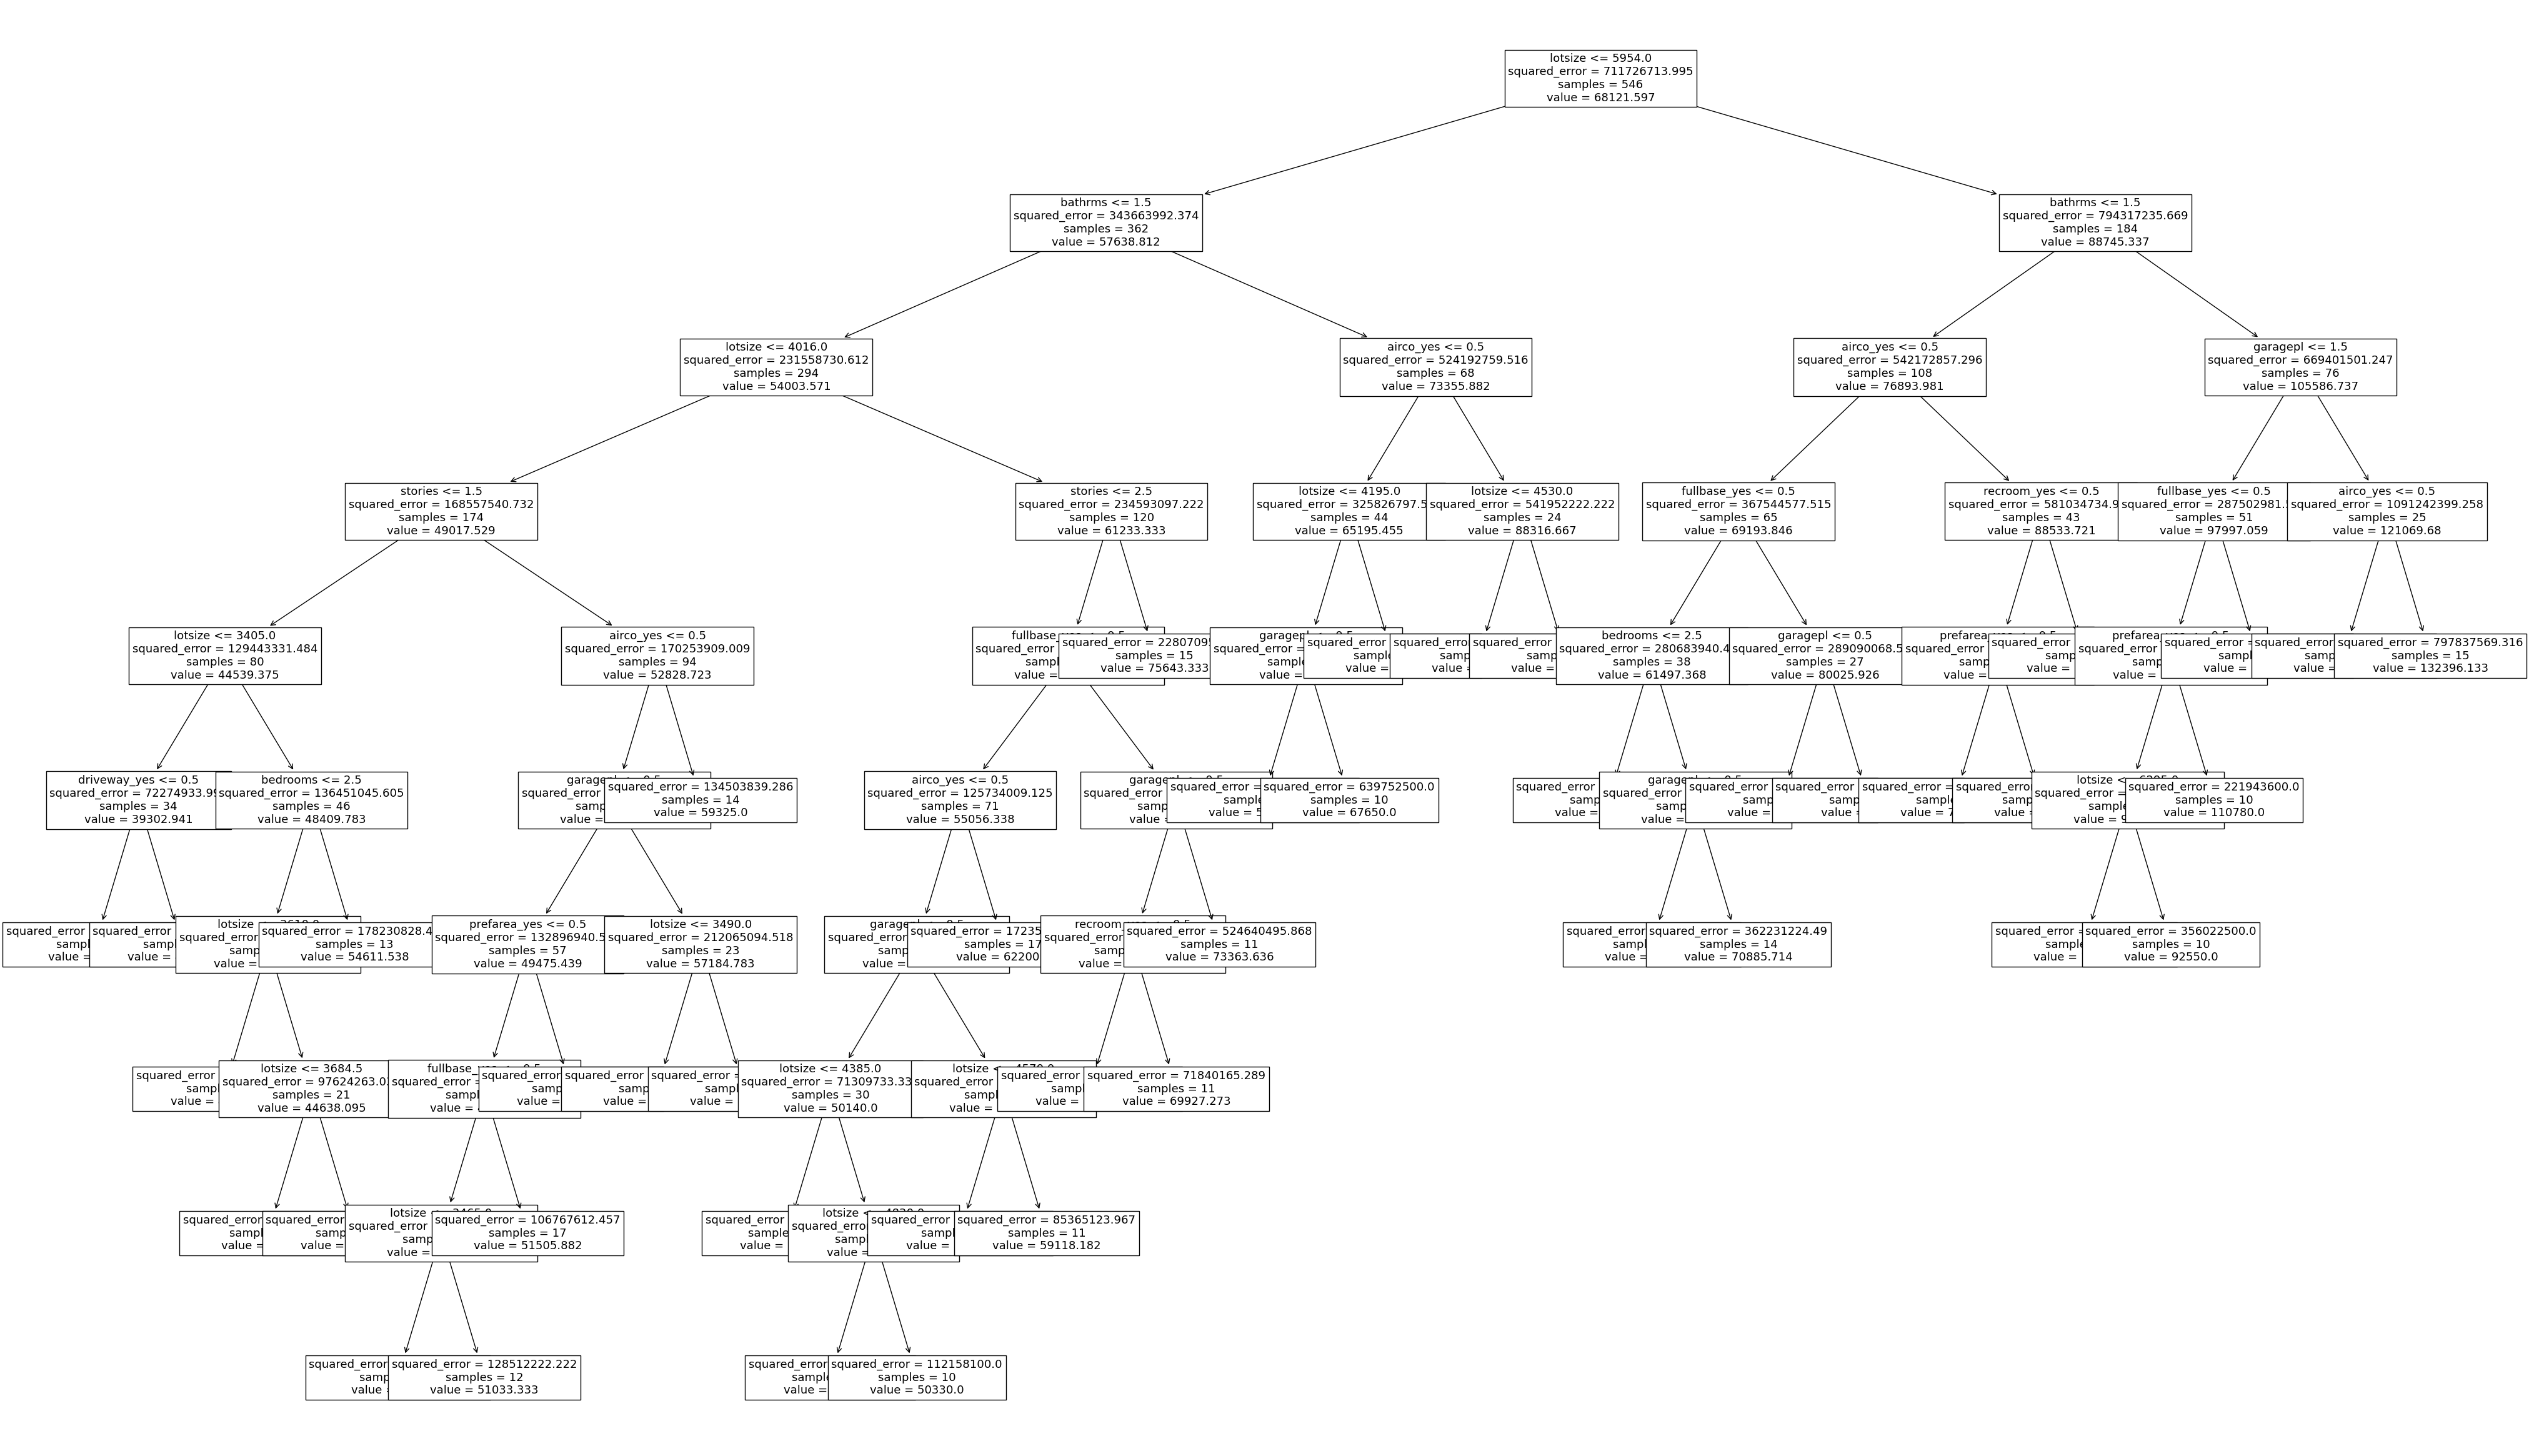

In [65]:
best_model = gcv.best_estimator_
plt.figure(figsize = (50,30))
plot_tree(best_model, feature_names = X.columns,
          class_names=['0','1'], fontsize= 13)
plt.show()

# Feature importance plot

[0.53023423 0.00822993 0.22208606 0.02525911 0.05311727 0.00119798
 0.01262219 0.04091421 0.         0.09527197 0.01106704]


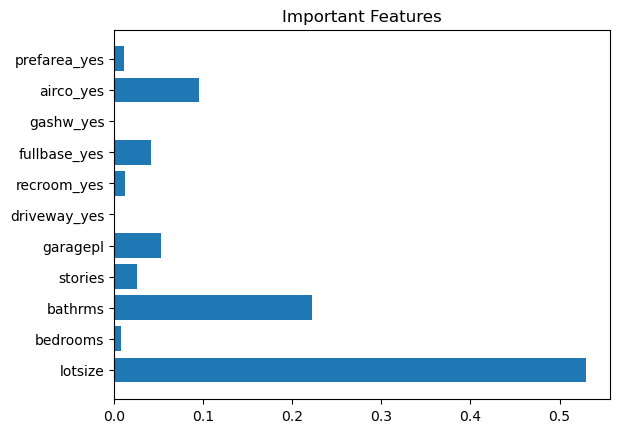

In [66]:
print(best_model.feature_importances_)

imps = best_model.feature_importances_
plt.barh(X.columns, imps)
plt.title("Important Features")
plt.show()